In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Joel_1 = "The word of the LORD that came to Joel the son of Pethuel.Hear this, you old men, and give ear, all you inhabitants of the land. Has this been in your days, or even in the days of your fathers?Tell you your children of it, and let your children tell their children, and their children another generation.That which the palmerworm has left has the locust eaten; and that which the locust has left has the cankerworm eaten; and that which the cankerworm has left has the caterpillar eaten.Awake, you drunkards, and weep; and howl, all you drinkers of wine, because of the new wine; for it is cut off from your mouth.For a nation is come up on my land, strong, and without number, whose teeth are the teeth of a lion, and he has the cheek teeth of a great lion.He has laid my vine waste, and barked my fig tree: he has made it clean bore, and cast it away; the branches thereof are made white.Lament like a virgin girded with sackcloth for the husband of her youth.The meat offering and the drink offering is cut off from the house of the LORD; the priests, the LORD' ministers, mourn.The field is wasted, the land mourns; for the corn is wasted: the new wine is dried up, the oil languishes.Be you ashamed, O you farmers; howl, O you vinedressers, for the wheat and for the barley; because the harvest of the field is perished.The vine is dried up, and the fig tree languishes; the pomegranate tree, the palm tree also, and the apple tree, even all the trees of the field, are withered: because joy is withered away from the sons of men.Gird yourselves, and lament, you priests: howl, you ministers of the altar: come, lie all night in sackcloth, you ministers of my God: for the meat offering and the drink offering is withheld from the house of your God.Sanctify you a fast, call a solemn assembly, gather the elders and all the inhabitants of the land into the house of the LORD your God, and cry to the LORD,Alas for the day! for the day of the LORD is at hand, and as a destruction from the Almighty shall it come.Is not the meat cut off before our eyes, yes, joy and gladness from the house of our God?The seed is rotten under their clods, the garners are laid desolate, the barns are broken down; for the corn is withered.How do the beasts groan! the herds of cattle are perplexed, because they have no pasture; yes, the flocks of sheep are made desolate.O LORD, to you will I cry: for the fire has devoured the pastures of the wilderness, and the flame has burned all the trees of the field.The beasts of the field cry also to you: for the rivers of waters are dried up, and the fire has devoured the pastures of the wilderness.".lower()

In [6]:
Joel_2 = "Blow you the trumpet in Zion, and sound an alarm in my holy mountain: let all the inhabitants of the land tremble: for the day of the LORD comes, for it is near at hand;A day of darkness and of gloominess, a day of clouds and of thick darkness, as the morning spread on the mountains: a great people and a strong; there has not been ever the like, neither shall be any more after it, even to the years of many generations.A fire devours before them; and behind them a flame burns: the land is as the garden of Eden before them, and behind them a desolate wilderness; yes, and nothing shall escape them.The appearance of them is as the appearance of horses; and as horsemen, so shall they run.Like the noise of chariots on the tops of mountains shall they leap, like the noise of a flame of fire that devours the stubble, as a strong people set in battle arrayBefore their face the people shall be much pained: all faces shall gather blackness.They shall run like mighty men; they shall climb the wall like men of war; and they shall march every one on his ways, and they shall not break their ranks:Neither shall one thrust another; they shall walk every one in his path: and when they fall on the sword, they shall not be wounded.They shall run to and fro in the city; they shall run on the wall, they shall climb up on the houses; they shall enter in at the windows like a thief.The earth shall quake before them; the heavens shall tremble: the sun and the moon shall be dark, and the stars shall withdraw their shining:And the LORD shall utter his voice before his army: for his camp is very great: for he is strong that executes his word: for the day of the LORD is great and very terrible; and who can abide it?Therefore also now, said the LORD, turn you even to me with all your heart, and with fasting, and with weeping, and with mourning:And rend your heart, and not your garments, and turn to the LORD your God: for he is gracious and merciful, slow to anger, and of great kindness, and repents him of the evil.Who knows if he will return and repent, and leave a blessing behind him; even a meat offering and a drink offering to the LORD your God?Blow the trumpet in Zion, sanctify a fast, call a solemn assembly:Gather the people, sanctify the congregation, assemble the elders, gather the children, and those that suck the breasts: let the bridegroom go forth of his chamber, and the bride out of her closet.Let the priests, the ministers of the LORD, weep between the porch and the altar, and let them say, Spare your people, O LORD, and give not your heritage to reproach, that the heathen should rule over them: why should they say among the people, Where is their God?Then will the LORD be jealous for his land, and pity his people.Yes, the LORD will answer and say to his people, Behold, I will send you corn, and wine, and oil, and you shall be satisfied therewith: and I will no more make you a reproach among the heathen:But I will remove far off from you the northern army, and will drive him into a land barren and desolate, with his face toward the east sea, and his hinder part toward the utmost sea, and his stink shall come up, and his ill smell shall come up, because he has done great things.Fear not, O land; be glad and rejoice: for the LORD will do great things.Be not afraid, you beasts of the field: for the pastures of the wilderness do spring, for the tree bears her fruit, the fig tree and the vine do yield their strength.Be glad then, you children of Zion, and rejoice in the LORD your God: for he has given you the former rain moderately, and he will cause to come down for you the rain, the former rain, and the latter rain in the first month.And the floors shall be full of wheat, and the vats shall overflow with wine and oil.And I will restore to you the years that the locust has eaten, the cankerworm, and the caterpillar, and the palmerworm, my great army which I sent among you.And you shall eat in plenty, and be satisfied, and praise the name of the LORD your God, that has dealt wondrously with you: and my people shall never be ashamed.And you shall know that I am in the middle of Israel, and that I am the LORD your God, and none else: and my people shall never be ashamed.And it shall come to pass afterward, that I will pour out my spirit on all flesh; and your sons and your daughters shall prophesy, your old men shall dream dreams, your young men shall see visions:And also on the servants and on the handmaids in those days will I pour out my spirit.And I will show wonders in the heavens and in the earth, blood, and fire, and pillars of smoke.The sun shall be turned into darkness, and the moon into blood, before the great and terrible day of the LORD come.And it shall come to pass, that whoever shall call on the name of the LORD shall be delivered: for in mount Zion and in Jerusalem shall be deliverance, as the LORD has said, and in the remnant whom the LORD shall call.".lower()

In [7]:
Joel_3 = "For, behold, in those days, and in that time, when I shall bring again the captivity of Judah and Jerusalem,I will also gather all nations, and will bring them down into the valley of Jehoshaphat, and will plead with them there for my people and for my heritage Israel, whom they have scattered among the nations, and parted my land.And they have cast lots for my people; and have given a boy for an harlot, and sold a girl for wine, that they might drink.Yes, and what have you to do with me, O Tyre, and Zidon, and all the coasts of Palestine? will you render me a recompense? and if you recompense me, swiftly and speedily will I return your recompense on your own head;Because you have taken my silver and my gold, and have carried into your temples my goodly pleasant things:The children also of Judah and the children of Jerusalem have you sold to the Grecians, that you might remove them far from their border.Behold, I will raise them out of the place where you have sold them, and will return your recompense on your own head:And I will sell your sons and your daughters into the hand of the children of Judah, and they shall sell them to the Sabeans, to a people far off: for the LORD has spoken it.Proclaim you this among the Gentiles; Prepare war, wake up the mighty men, let all the men of war draw near; let them come up:Beat your plowshares into swords and your pruning hooks into spears: let the weak say, I am strong.Assemble yourselves, and come, all you heathen, and gather yourselves together round about: thither cause your mighty ones to come down, O LORD.Let the heathen be wakened, and come up to the valley of Jehoshaphat: for there will I sit to judge all the heathen round about.Put you in the sickle, for the harvest is ripe: come, get you down; for the press is full, the fats overflow; for their wickedness is great.Multitudes, multitudes in the valley of decision: for the day of the LORD is near in the valley of decision.The sun and the moon shall be darkened, and the stars shall withdraw their shining.The LORD also shall roar out of Zion, and utter his voice from Jerusalem; and the heavens and the earth shall shake: but the LORD will be the hope of his people, and the strength of the children of Israel.So shall you know that I am the LORD your God dwelling in Zion, my holy mountain: then shall Jerusalem be holy, and there shall no strangers pass through her any more.And it shall come to pass in that day, that the mountains shall drop down new wine, and the hills shall flow with milk, and all the rivers of Judah shall flow with waters, and a fountain shall come forth out of the house of the LORD, and shall water the valley of Shittim.Egypt shall be a desolation, and Edom shall be a desolate wilderness, for the violence against the children of Judah, because they have shed innocent blood in their land.But Judah shall dwell for ever, and Jerusalem from generation to generation.For I will cleanse their blood that I have not cleansed: for the LORD dwells in Zion.".lower()

In [18]:
tokens = nltk.word_tokenize(Joel_3)

In [19]:
stop_words = set(stopwords.words('english'))

In [20]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [21]:
print(filtered_sentence1)

[',', 'behold', ',', 'days', ',', 'time', ',', 'shall', 'bring', 'captivity', 'judah', 'jerusalem', ',', 'also', 'gather', 'nations', ',', 'bring', 'valley', 'jehoshaphat', ',', 'plead', 'people', 'heritage', 'israel', ',', 'scattered', 'among', 'nations', ',', 'parted', 'land.and', 'cast', 'lots', 'people', ';', 'given', 'boy', 'harlot', ',', 'sold', 'girl', 'wine', ',', 'might', 'drink.yes', ',', ',', 'tyre', ',', 'zidon', ',', 'coasts', 'palestine', '?', 'render', 'recompense', '?', 'recompense', ',', 'swiftly', 'speedily', 'return', 'recompense', 'head', ';', 'taken', 'silver', 'gold', ',', 'carried', 'temples', 'goodly', 'pleasant', 'things', ':', 'children', 'also', 'judah', 'children', 'jerusalem', 'sold', 'grecians', ',', 'might', 'remove', 'far', 'border.behold', ',', 'raise', 'place', 'sold', ',', 'return', 'recompense', 'head', ':', 'sell', 'sons', 'daughters', 'hand', 'children', 'judah', ',', 'shall', 'sell', 'sabeans', ',', 'people', 'far', ':', 'lord', 'spoken', 'it.proc

In [5]:
data =np.array([["Joel_1", "'word', 'lord', 'came', 'joel', 'son', 'pethuel.hear', ',', 'old', 'men', ',', 'give', 'ear', ',', 'inhabitants', 'land', '.', 'days', ',', 'even', 'days', 'fathers', '?', 'tell', 'children', ',', 'let', 'children', 'tell', 'children', ',', 'children', 'another', 'generation.that', 'palmerworm', 'left', 'locust', 'eaten', ';', 'locust', 'left', 'cankerworm', 'eaten', ';', 'cankerworm', 'left', 'caterpillar', 'eaten.awake', ',', 'drunkards', ',', 'weep', ';', 'howl', ',', 'drinkers', 'wine', ',', 'new', 'wine', ';', 'cut', 'mouth.for', 'nation', 'come', 'land', ',', 'strong', ',', 'without', 'number', ',', 'whose', 'teeth', 'teeth', 'lion', ',', 'cheek', 'teeth', 'great', 'lion.he', 'laid', 'vine', 'waste', ',', 'barked', 'fig', 'tree', ':', 'made', 'clean', 'bore', ',', 'cast', 'away', ';', 'branches', 'thereof', 'made', 'white.lament', 'like', 'virgin', 'girded', 'sackcloth', 'husband', 'youth.the', 'meat', 'offering', 'drink', 'offering', 'cut', 'house', 'lord', ';', 'priests', ',', 'lord', ', 'ministers', ',', 'mourn.the', 'field', 'wasted', ',', 'land', 'mourns', ';', 'corn', 'wasted', ':', 'new', 'wine', 'dried', ',', 'oil', 'languishes.be', 'ashamed', ',', 'farmers', ';', 'howl', ',', 'vinedressers', ',', 'wheat', 'barley', ';', 'harvest', 'field', 'perished.the', 'vine', 'dried', ',', 'fig', 'tree', 'languishes', ';', 'pomegranate', 'tree', ',', 'palm', 'tree', 'also', ',', 'apple', 'tree', ',', 'even', 'trees', 'field', ',', 'withered', ':', 'joy', 'withered', 'away', 'sons', 'men.gird', ',', 'lament', ',', 'priests', ':', 'howl', ',', 'ministers', 'altar', ':', 'come', ',', 'lie', 'night', 'sackcloth', ',', 'ministers', 'god', ':', 'meat', 'offering', 'drink', 'offering', 'withheld', 'house', 'god.sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ',', 'gather', 'elders', 'inhabitants', 'land', 'house', 'lord', 'god', ',', 'cry', 'lord', ',', 'alas', 'day', '!', 'day', 'lord', 'hand', ',', 'destruction', 'almighty', 'shall', 'come.is', 'meat', 'cut', 'eyes', ',', 'yes', ',', 'joy', 'gladness', 'house', 'god', '?', 'seed', 'rotten', 'clods', ',', 'garners', 'laid', 'desolate', ',', 'barns', 'broken', ';', 'corn', 'withered.how', 'beasts', 'groan', '!', 'herds', 'cattle', 'perplexed', ',', 'pasture', ';', 'yes', ',', 'flocks', 'sheep', 'made', 'desolate.o', 'lord', ',', 'cry', ':', 'fire', 'devoured', 'pastures', 'wilderness', ',', 'flame', 'burned', 'trees', 'field.the', 'beasts', 'field', 'cry', 'also', ':', 'rivers', 'waters', 'dried', ',', 'fire', 'devoured', 'pastures', 'wilderness', '.'"],
               ["Joel_2", "'blow', 'trumpet', 'zion', ',', 'sound', 'alarm', 'holy', 'mountain', ':', 'let', 'inhabitants', 'land', 'tremble', ':', 'day', 'lord', 'comes', ',', 'near', 'hand', ';', 'day', 'darkness', 'gloominess', ',', 'day', 'clouds', 'thick', 'darkness', ',', 'morning', 'spread', 'mountains', ':', 'great', 'people', 'strong', ';', 'ever', 'like', ',', 'neither', 'shall', ',', 'even', 'years', 'many', 'generations.a', 'fire', 'devours', ';', 'behind', 'flame', 'burns', ':', 'land', 'garden', 'eden', ',', 'behind', 'desolate', 'wilderness', ';', 'yes', ',', 'nothing', 'shall', 'escape', 'them.the', 'appearance', 'appearance', 'horses', ';', 'horsemen', ',', 'shall', 'run.like', 'noise', 'chariots', 'tops', 'mountains', 'shall', 'leap', ',', 'like', 'noise', 'flame', 'fire', 'devours', 'stubble', ',', 'strong', 'people', 'set', 'battle', 'arraybefore', 'face', 'people', 'shall', 'much', 'pained', ':', 'faces', 'shall', 'gather', 'blackness.they', 'shall', 'run', 'like', 'mighty', 'men', ';', 'shall', 'climb', 'wall', 'like', 'men', 'war', ';', 'shall', 'march', 'every', 'one', 'ways', ',', 'shall', 'break', 'ranks', ':', 'neither', 'shall', 'one', 'thrust', 'another', ';', 'shall', 'walk', 'every', 'one', 'path', ':', 'fall', 'sword', ',', 'shall', 'wounded.they', 'shall', 'run', 'fro', 'city', ';', 'shall', 'run', 'wall', ',', 'shall', 'climb', 'houses', ';', 'shall', 'enter', 'windows', 'like', 'thief.the', 'earth', 'shall', 'quake', ';', 'heavens', 'shall', 'tremble', ':', 'sun', 'moon', 'shall', 'dark', ',', 'stars', 'shall', 'withdraw', 'shining', ':', 'lord', 'shall', 'utter', 'voice', 'army', ':', 'camp', 'great', ':', 'strong', 'executes', 'word', ':', 'day', 'lord', 'great', 'terrible', ';', 'abide', '?', 'therefore', 'also', ',', 'said', 'lord', ',', 'turn', 'even', 'heart', ',', 'fasting', ',', 'weeping', ',', 'mourning', ':', 'rend', 'heart', ',', 'garments', ',', 'turn', 'lord', 'god', ':', 'gracious', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repents', 'evil.who', 'knows', 'return', 'repent', ',', 'leave', 'blessing', 'behind', ';', 'even', 'meat', 'offering', 'drink', 'offering', 'lord', 'god', '?', 'blow', 'trumpet', 'zion', ',', 'sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ':', 'gather', 'people', ',', 'sanctify', 'congregation', ',', 'assemble', 'elders', ',', 'gather', 'children', ',', 'suck', 'breasts', ':', 'let', 'bridegroom', 'go', 'forth', 'chamber', ',', 'bride', 'closet.let', 'priests', ',', 'ministers', 'lord', ',', 'weep', 'porch', 'altar', ',', 'let', 'say', ',', 'spare', 'people', ',', 'lord', ',', 'give', 'heritage', 'reproach', ',', 'heathen', 'rule', ':', 'say', 'among', 'people', ',', 'god', '?', 'lord', 'jealous', 'land', ',', 'pity', 'people.yes', ',', 'lord', 'answer', 'say', 'people', ',', 'behold', ',', 'send', 'corn', ',', 'wine', ',', 'oil', ',', 'shall', 'satisfied', 'therewith', ':', 'make', 'reproach', 'among', 'heathen', ':', 'remove', 'far', 'northern', 'army', ',', 'drive', 'land', 'barren', 'desolate', ',', 'face', 'toward', 'east', 'sea', ',', 'hinder', 'part', 'toward', 'utmost', 'sea', ',', 'stink', 'shall', 'come', ',', 'ill', 'smell', 'shall', 'come', ',', 'done', 'great', 'things.fear', ',', 'land', ';', 'glad', 'rejoice', ':', 'lord', 'great', 'things.be', 'afraid', ',', 'beasts', 'field', ':', 'pastures', 'wilderness', 'spring', ',', 'tree', 'bears', 'fruit', ',', 'fig', 'tree', 'vine', 'yield', 'strength.be', 'glad', ',', 'children', 'zion', ',', 'rejoice', 'lord', 'god', ':', 'given', 'former', 'rain', 'moderately', ',', 'cause', 'come', 'rain', ',', 'former', 'rain', ',', 'latter', 'rain', 'first', 'month.and', 'floors', 'shall', 'full', 'wheat', ',', 'vats', 'shall', 'overflow', 'wine', 'oil.and', 'restore', 'years', 'locust', 'eaten', ',', 'cankerworm', ',', 'caterpillar', ',', 'palmerworm', ',', 'great', 'army', 'sent', 'among', 'you.and', 'shall', 'eat', 'plenty', ',', 'satisfied', ',', 'praise', 'name', 'lord', 'god', ',', 'dealt', 'wondrously', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'know', 'middle', 'israel', ',', 'lord', 'god', ',', 'none', 'else', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'come', 'pass', 'afterward', ',', 'pour', 'spirit', 'flesh', ';', 'sons', 'daughters', 'shall', 'prophesy', ',', 'old', 'men', 'shall', 'dream', 'dreams', ',', 'young', 'men', 'shall', 'see', 'visions', ':', 'also', 'servants', 'handmaids', 'days', 'pour', 'spirit.and', 'show', 'wonders', 'heavens', 'earth', ',', 'blood', ',', 'fire', ',', 'pillars', 'smoke.the', 'sun', 'shall', 'turned', 'darkness', ',', 'moon', 'blood', ',', 'great', 'terrible', 'day', 'lord', 'come.and', 'shall', 'come', 'pass', ',', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'delivered', ':', 'mount', 'zion', 'jerusalem', 'shall', 'deliverance', ',', 'lord', 'said', ',', 'remnant', 'lord', 'shall', 'call', '.'"],
               ["Joel_3", "',', 'behold', ',', 'days', ',', 'time', ',', 'shall', 'bring', 'captivity', 'judah', 'jerusalem', ',', 'also', 'gather', 'nations', ',', 'bring', 'valley', 'jehoshaphat', ',', 'plead', 'people', 'heritage', 'israel', ',', 'scattered', 'among', 'nations', ',', 'parted', 'land.and', 'cast', 'lots', 'people', ';', 'given', 'boy', 'harlot', ',', 'sold', 'girl', 'wine', ',', 'might', 'drink.yes', ',', ',', 'tyre', ',', 'zidon', ',', 'coasts', 'palestine', '?', 'render', 'recompense', '?', 'recompense', ',', 'swiftly', 'speedily', 'return', 'recompense', 'head', ';', 'taken', 'silver', 'gold', ',', 'carried', 'temples', 'goodly', 'pleasant', 'things', ':', 'children', 'also', 'judah', 'children', 'jerusalem', 'sold', 'grecians', ',', 'might', 'remove', 'far', 'border.behold', ',', 'raise', 'place', 'sold', ',', 'return', 'recompense', 'head', ':', 'sell', 'sons', 'daughters', 'hand', 'children', 'judah', ',', 'shall', 'sell', 'sabeans', ',', 'people', 'far', ':', 'lord', 'spoken', 'it.proclaim', 'among', 'gentiles', ';', 'prepare', 'war', ',', 'wake', 'mighty', 'men', ',', 'let', 'men', 'war', 'draw', 'near', ';', 'let', 'come', ':', 'beat', 'plowshares', 'swords', 'pruning', 'hooks', 'spears', ':', 'let', 'weak', 'say', ',', 'strong.assemble', ',', 'come', ',', 'heathen', ',', 'gather', 'together', 'round', ':', 'thither', 'cause', 'mighty', 'ones', 'come', ',', 'lord.let', 'heathen', 'wakened', ',', 'come', 'valley', 'jehoshaphat', ':', 'sit', 'judge', 'heathen', 'round', 'about.put', 'sickle', ',', 'harvest', 'ripe', ':', 'come', ',', 'get', ';', 'press', 'full', ',', 'fats', 'overflow', ';', 'wickedness', 'great.multitudes', ',', 'multitudes', 'valley', 'decision', ':', 'day', 'lord', 'near', 'valley', 'decision.the', 'sun', 'moon', 'shall', 'darkened', ',', 'stars', 'shall', 'withdraw', 'shining.the', 'lord', 'also', 'shall', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'heavens', 'earth', 'shall', 'shake', ':', 'lord', 'hope', 'people', ',', 'strength', 'children', 'israel.so', 'shall', 'know', 'lord', 'god', 'dwelling', 'zion', ',', 'holy', 'mountain', ':', 'shall', 'jerusalem', 'holy', ',', 'shall', 'strangers', 'pass', 'more.and', 'shall', 'come', 'pass', 'day', ',', 'mountains', 'shall', 'drop', 'new', 'wine', ',', 'hills', 'shall', 'flow', 'milk', ',', 'rivers', 'judah', 'shall', 'flow', 'waters', ',', 'fountain', 'shall', 'come', 'forth', 'house', 'lord', ',', 'shall', 'water', 'valley', 'shittim.egypt', 'shall', 'desolation', ',', 'edom', 'shall', 'desolate', 'wilderness', ',', 'violence', 'children', 'judah', ',', 'shed', 'innocent', 'blood', 'land.but', 'judah', 'shall', 'dwell', 'ever', ',', 'jerusalem', 'generation', 'generation.for', 'cleanse', 'blood', 'cleansed', ':', 'lord', 'dwells', 'zion', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,103),columns=['Autor', 'Livro'])

In [7]:
print(df)

      Autor                                              Livro
100  Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...
101  Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...
102  Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...


In [8]:
corpus = df['Livro'].tolist()

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

3 rows


,0,1,2
devoured pastures wilderness,0.129385,0.000000,0.0
fire devoured pastures,0.129385,0.000000,0.0
meat offering drink,0.098401,0.034975,0.0
offering drink offering,0.098401,0.034975,0.0
alas day day,0.064693,0.000000,0.0
almighty shall come,0.064693,0.000000,0.0
also apple tree,0.064693,0.000000,0.0
also rivers waters,0.064693,0.000000,0.0
altar come lie,0.064693,0.000000,0.0
another generation that,0.064693,0.000000,0.0


In [10]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [11]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [12]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


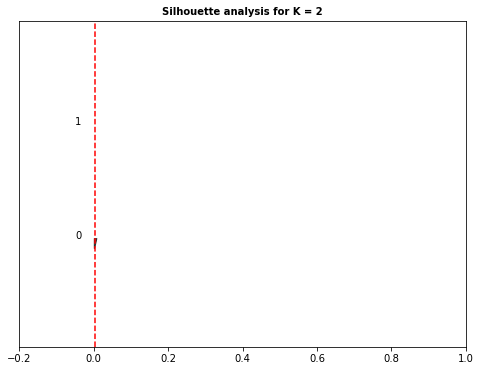

In [13]:
silhouette(kmeans_results, final_df, plot=True)

In [14]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

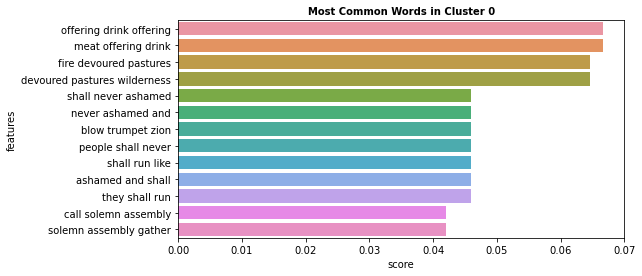

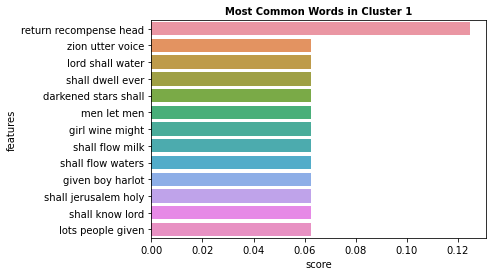

In [16]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [17]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

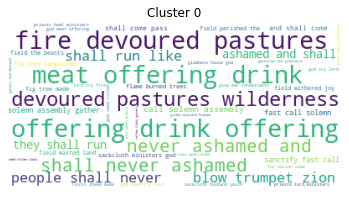

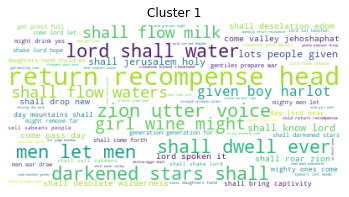

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [19]:
print(df)

      Autor                                              Livro
100  Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...
101  Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...
102  Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...
